<a href="https://colab.research.google.com/github/vikashGCU/DSC550/blob/main/DSC_550_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
#Uploading the training data
uploaded=files.upload()


Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
#Uploading testing data
uploaded=files.upload()


Saving sign_mnist_test.csv to sign_mnist_test.csv


In [5]:
# Creating function to read the training and test data
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [6]:
# In this section we  will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Model creation
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Configure generators
train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(
    train_gen,
    epochs=20,
    validation_data=val_gen
)

model.evaluate(testing_images, testing_labels)
 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
429/429 [==============================] - 32s 73ms/step - loss: 2.7644 - accuracy: 0.1661 - val_loss: 2.6484 - val_accuracy: 0.1527
Epoch 2/20
429/429 [==============================] - 31s 73ms/step - loss: 2.0390 - accuracy: 0.3544 - val_loss: 1.4654 - val_accuracy: 0.4990
Epoch 3/20
429/429 [==============================] - 31s 72ms/step - loss: 1.6477 - accuracy: 0.4678 - val_loss: 1.0561 - val_accuracy: 0.6371
Epoch 4/20
429/429 [==============================] - 31s 73ms/step - loss: 1.4002 - accuracy: 0.5431 - val_loss: 0.7876 - val_accuracy: 0.7277
Epoch 5/20
429/429 [==============================] - 31s 72ms/step - loss: 1.2075 - accuracy: 0.6001 - val_loss: 0.8006 - val_accuracy: 0.7115
Epoch 6/20
429/429 [==============================] - 31s 72ms/step - loss: 1.0672 - accuracy: 0.6495 - val_loss: 0.7357 - val_accuracy: 0.7234
Epoch 7/20
429/429 [==============================] - 31s 72ms/step - loss: 0.9616 - accuracy: 0.6824 - val_loss: 0.5720 - val_accuracy:

[99.24464416503906, 0.8106525540351868]

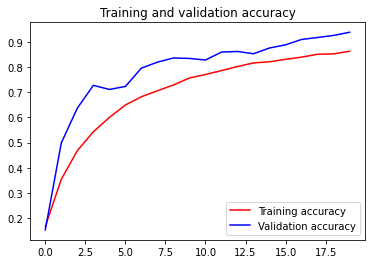

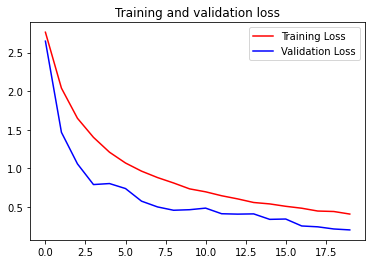

In [10]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()